In [1]:
import sys
sys.path.append('../') #
import paths
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mimic_files=["mimic.json","mimic_no_img.json", "mimic_no_candidate_img.json"]
blink_files=["BLINK_Biencoder.json","BLINK_Cross.json"]

In [24]:
base_mimic_path = paths.OUTPUT_DATASETS_PATH / 'melart_mimic' / 'MELART_test.json'
mimic_test_set = json.load(open(base_mimic_path))
mimic_test_set[:5]

[{'id': 'Q1608116_0',
  'sentence': 'It is also stylistically earlier to that work, being painted without pseudo-perspective, and having the angels around the Virgin simply placed one above the other, rather than being spatially arranged.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Virgin',
  'entities': 'Mary',
  'answer': 'Q345'},
 {'id': 'Q1608116_1',
  'sentence': 'This work established a new canon for the Madonna with Child theme, which was subsequently used by other painters, such as Duccio di Buoninsegna in his Rucellai Maestà.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Madonna',
  'entities': 'Mary',
  'answer': 'Q345'},
 {'id': 'Q1608116_2',
  'sentence': 'This work established a new canon for the Madonna with Child theme, which was subsequently used by other painters, such as Duccio di Buoninsegna in his Rucellai Maestà.',
  'imgPath': 'Q1608116.jpg',
  'mentions': 'Child',
  'entities': 'Christ Child',
  'answer': 'Q942467'},
 {'id': 'Q3797775_0',
  'sentence': 'The thr

In [16]:
ranks=None
for mimic_file in mimic_files:
    anns=json.load(open(mimic_file))
    if ranks is None:
        #fill with empty dictionaries
        ranks=[{} for i in range(len(anns))]
    for i,ann in enumerate(anns):
        ranks[i][mimic_file]=ann['gt_rank']+1
ranks[:10]

[{'mimic.json': 1, 'mimic_no_img.json': 16, 'mimic_no_candidate_img.json': 20},
 {'mimic.json': 5, 'mimic_no_img.json': 15, 'mimic_no_candidate_img.json': 14},
 {'mimic.json': 2, 'mimic_no_img.json': 4, 'mimic_no_candidate_img.json': 7},
 {'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 2, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 1, 'mimic_no_img.json': 1, 'mimic_no_candidate_img.json': 1},
 {'mimic.json': 16,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 20},
 {'mimic.json': 11, 'mimic_no_img.json': 5, 'mimic_no_candidate_img.json': 2},
 {'mimic.json': 11, 'mimic_no_img.json': 5, 'mimic_no_candidate_img.json': 2},
 {'mimic.json': 3, 'mimic_no_img.json': 6, 'mimic_no_candidate_img.json': 3}]

In [17]:
labels={
    "mimic.json":"MIMIC",
    "mimic_no_img.json":"MIMIC (no images)",
    "mimic_no_candidate_img.json":"MIMIC (no candidate image)",
    "BLINK_Biencoder.json":"BLINK (Biencoder)",
    "BLINK_Cross.json":"BLINK (Crossencoder)"
}

In [18]:
for blink_file in blink_files:
    anns=json.load(open(blink_file))
    for i,ann in enumerate(anns):
        ranks[i][blink_file]=ann['gt_rank']+1 if ann['gt_rank']>=0 else 500
ranks[:10]

[{'mimic.json': 1,
  'mimic_no_img.json': 16,
  'mimic_no_candidate_img.json': 20,
  'BLINK_Biencoder.json': 12,
  'BLINK_Cross.json': 1},
 {'mimic.json': 5,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 14,
  'BLINK_Biencoder.json': 4,
  'BLINK_Cross.json': 1},
 {'mimic.json': 2,
  'mimic_no_img.json': 4,
  'mimic_no_candidate_img.json': 7,
  'BLINK_Biencoder.json': 2,
  'BLINK_Cross.json': 1},
 {'mimic.json': 1,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 12,
  'BLINK_Cross.json': 1},
 {'mimic.json': 2,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 6,
  'BLINK_Cross.json': 1},
 {'mimic.json': 1,
  'mimic_no_img.json': 1,
  'mimic_no_candidate_img.json': 1,
  'BLINK_Biencoder.json': 14,
  'BLINK_Cross.json': 1},
 {'mimic.json': 16,
  'mimic_no_img.json': 15,
  'mimic_no_candidate_img.json': 20,
  'BLINK_Biencoder.json': 4,
  'BLINK_Cross.json': 1},
 {'mimic.json': 11,
  'mimic_no_img.js

Text(0, 0.5, 'BLINK_Cross')

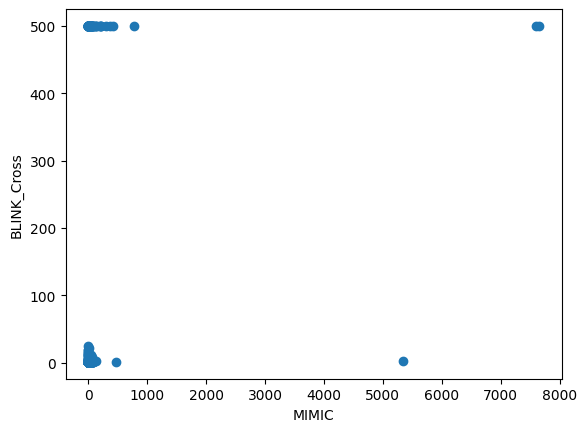

In [20]:
#plot a scatter plot with the values of mimic and BLINK_Cross
plt.scatter([r['mimic.json'] for r in ranks], [r['BLINK_Cross.json'] for r in ranks])
plt.xlabel("MIMIC")
plt.ylabel("BLINK_Cross")
#plt.xlim(0,30)
#plt.ylim(0,30)


/tmp/ipykernel_1948935/3380727739.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([[r[f] for r in ranks] for f in mimic_files+blink_files],labels=[labels[f] for f in mimic_files+blink_files])


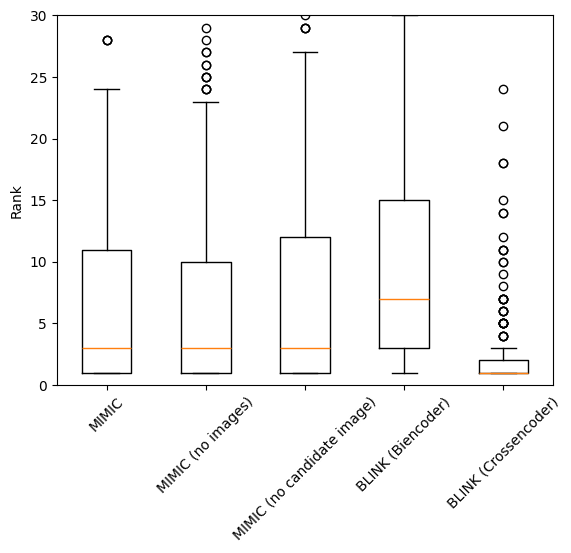

In [21]:
#plot a boxplot for all ranks the methods
plt.boxplot([[r[f] for r in ranks] for f in mimic_files+blink_files],labels=[labels[f] for f in mimic_files+blink_files])
plt.ylabel("Rank")
plt.ylim(0,30)
plt.xticks(rotation=45)
plt.show()


In [26]:
qids=[obj["answer"] for obj in mimic_test_set]
len(qids)

645

In [27]:
#dictionary with qid as key and the list of indices as value
qid2idxs={}
for i,qid in enumerate(qids):
    if qid not in qid2idxs:
        qid2idxs[qid]=[]
    qid2idxs[qid].append(i)
qid2idxs["Q345"]

[0,
 1,
 6,
 9,
 24,
 25,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 50,
 55,
 57,
 61,
 65,
 69,
 72,
 75,
 81,
 83,
 84,
 88,
 89,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 109,
 119,
 121,
 122,
 123,
 124,
 126,
 128,
 131,
 142,
 146,
 148,
 163,
 166,
 189,
 193,
 194,
 199,
 201,
 202,
 203,
 206,
 208,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 225,
 227,
 228,
 230,
 231,
 232,
 233,
 234,
 236,
 238,
 239,
 241,
 245,
 246,
 248,
 249,
 257,
 259,
 266,
 268,
 269,
 270,
 271,
 277,
 279,
 300,
 302,
 307,
 308,
 310,
 311,
 312,
 360,
 361,
 362,
 363,
 366,
 383]

In [28]:
len(qid2idxs)

124

In [29]:
qid2label={}
for ann in mimic_test_set:
    qid2label[ann["answer"]]=ann["entities"]
qid2label["Q345"]

'Mary'

In [30]:
len(qid2label)

124

In [33]:
# dictionary with qid as key and the list of ranks per method as value
qid2ranks={}
for qid,idxs in qid2idxs.items():
    qid2ranks[qid]={}
    for f in mimic_files+blink_files:
        qid2ranks[qid][labels[f]]=[ranks[i][f] for i in idxs]

In [44]:
num_ranks_per_qid=[]
for qid,ranks in qid2ranks.items():
    num_ranks_per_qid.append((qid,len(ranks["MIMIC"])))
num_ranks_per_qid[:10]

[('Q345', 108),
 ('Q942467', 33),
 ('Q302', 62),
 ('Q1093370', 3),
 ('Q271474', 6),
 ('Q295084', 6),
 ('Q51636', 1),
 ('Q328804', 3),
 ('Q235377', 1),
 ('Q233067', 1)]

In [45]:
#sort indices by number of ranks
num_ranks_per_qid.sort(key=lambda x:x[1],reverse=True)
num_ranks_per_qid[:10]

[('Q345', 108),
 ('Q302', 62),
 ('Q942467', 33),
 ('Q5588', 18),
 ('Q42207', 16),
 ('Q47652', 15),
 ('Q676555', 14),
 ('Q5580', 13),
 ('Q645312', 10),
 ('Q41370', 10)]

In [8]:
map_method_color={
    "MIMIC":"blue",
    "MIMIC (no images)":"green",
    "MIMIC (no candidate image)":"purple",
    "BLINK (Biencoder)":"orange",
    "BLINK (Crossencoder)":"red"
}

/tmp/ipykernel_1948935/3289709353.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_1948935/3289709353.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


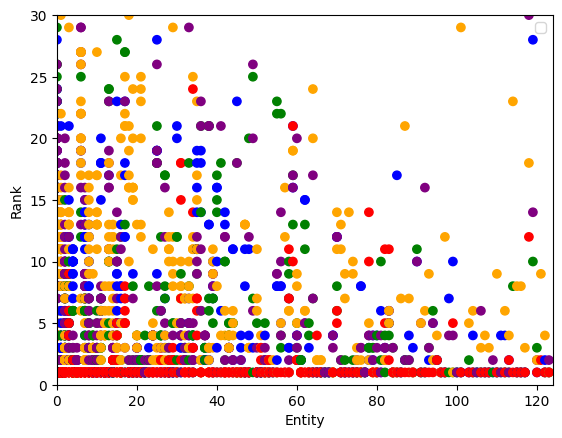

In [54]:
# plot the ranks for each entity, the entities are the x axis and the ranks are dots
pairs=[]
methods=[]
for i,(qid,_) in enumerate(num_ranks_per_qid):
    ranks=qid2ranks[qid]
    for method,rank in ranks.items():
        for r in rank:
            pairs.append((i,r))
            methods.append(method)
plt.scatter([p[0] for p in pairs], [p[1] for p in pairs],c=[map_method_color[m] for m in methods])
plt.legend()
plt.ylim(0,30)
plt.xlim(0,len(qid2ranks))
plt.ylabel("Rank")
plt.xlabel("Entity")
plt.legend()

In [91]:
top10=num_ranks_per_qid[:20]
last10=num_ranks_per_qid[-5:]
qids_plot=[qid for qid,_ in top10+last10]
qids_plot

['Q345',
 'Q302',
 'Q942467',
 'Q5588',
 'Q42207',
 'Q47652',
 'Q676555',
 'Q5580',
 'Q645312',
 'Q41370',
 'Q289957',
 'Q105320',
 'Q70899',
 'Q179718',
 'Q184874',
 'Q311469',
 'Q517',
 'Q338480',
 'Q44248',
 'Q48438',
 'Q196181',
 'Q1471',
 'Q8060',
 'Q440369',
 'Q405']

In [23]:
#boxplot for each entity and method
plt.figure(figsize=(20,8))
for i,qid in enumerate(qids_plot):
    ranks=qid2ranks[qid]
    for method,rank in ranks.items():
        #plt.boxplot(rank,positions=[i],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]))
        #move the boxplot to avoid overlapping
        plot=plt.boxplot([r for r in rank if r<30],positions=[i-0.42+0.2*list(ranks.keys()).index(method)],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]), showfliers=False)
        for median in plot["medians"]:
            median.set(color=map_method_color[method], linewidth=2)

        for box in plot["boxes"]:
            box.set(alpha=0.5)
        #plt.boxplot(rank,positions=[i-0.42+0.2*list(ranks.keys()).index(method)],boxprops=dict(facecolor=map_method_color[method]))
        #plt.scatter([i-0.42+0.2*list(ranks.keys()).index(method)]*len(rank),rank,c=map_method_color[method],label=method)
plt.ylabel("Rank")
plt.ylim(0,30)
plt.xlim(-0.5,len(qids_plot))
plt.xticks(range(len(qids_plot)),[f"{qid2label[qid]} ({qid}) ({len(qid2ranks[qid]["MIMIC"])})" for qid in qids_plot],rotation=90)
plt.legend(map_method_color.keys())
#add vertical lines to separate each entity
for i in range(len(qids_plot)):
    plt.axvline(x=i-0.5,color="grey")
plt.show()

NameError: name 'qids_plot' is not defined

<Figure size 2000x800 with 0 Axes>

In [5]:
baseline_results = pd.read_csv('BaselinesResults.csv')
baseline_results.head()

,model,hits@1,hits@3,hits@5,hits@10,hits@20,mr,mrr
0,MIMIC (no images),0.353488,0.528682,0.615504,0.733333,0.858915,53.714729,0.476866
1,MIMIC (no images),0.361240,0.545736,0.620155,0.717829,0.827907,85.339535,0.484353
2,MIMIC (no images),0.347287,0.524031,0.604651,0.711628,0.843411,109.094574,0.469369
3,MIMIC (no images),0.378295,0.531783,0.635659,0.762791,0.882171,54.565891,0.499826
4,MIMIC (no images),0.381395,0.528682,0.603101,0.713178,0.801550,56.347287,0.489982


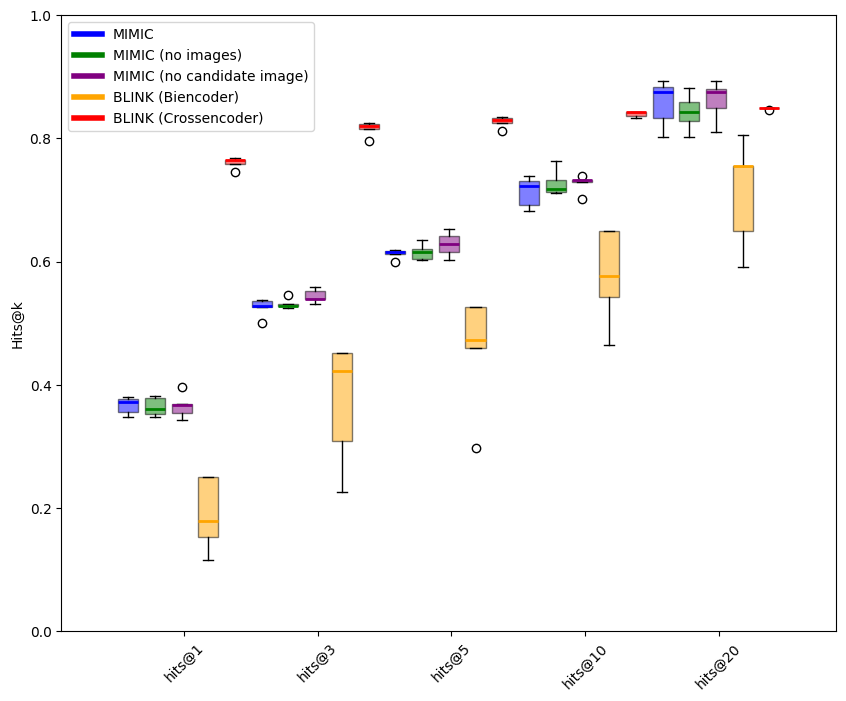

In [28]:
#boxplot from the baseline results. the x axis is hitt@k for k=1,3,5,10,20, then for each hits@k one boxplot per model
plt.figure(figsize=(10,8))
box_plots=[]
for method in map_method_color.keys():
    plots=[]
    for i,k in enumerate([1,3,5,10,20]):
        plot=plt.boxplot(baseline_results[baseline_results["model"]==method]["hits@{}".format(k)],positions=[i-0.42+0.2*list(map_method_color.keys()).index(method)],patch_artist=True,boxprops=dict(facecolor=map_method_color[method]), showfliers=True, label=method)
        plots.append(plot)
    box_plots.append(plots)
    for plot in plots:
        for median in plot["medians"]:
            median.set(color=map_method_color[method], linewidth=2)
        for box in plot["boxes"]:
            box.set(alpha=0.5)
plt.ylabel("Hits@k")
plt.ylim(0,1)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in map_method_color.values()]
plt.legend(handles, map_method_color.keys())
plt.xticks(rotation=45)
plt.xticks(range(5),[f"hits@{k}" for k in [1,3,5,10,20]])
#plt.legend(box_plots,[method for method in map_method_color.keys()])
#plt.legend(map_method_color)
plt.savefig("baseline_results.pdf")
plt.show()